In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete = load_umachine_sdss_with_meert15()
no_data_mask = np.isnan(full_sdss['Magr_tot_meert15'])

mask = ~no_data_mask & behroozi_complete
sdss = full_sdss[mask]
print(sdss.keys())
print("\nNumber of galaxies in complete sample = {0}".format(len(sdss)))

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'ssfr']

Number of galaxies in complete sample = 229889


In [3]:
from galsize_models.models.kravtsov13 import halo_radius_vs_stellar_mass
sdss['rvir_halo_kpc'] = halo_radius_vs_stellar_mass(10**sdss['sm'])

In [4]:
from galsize_models.measurements.rhalf_rvir_power_law_fit import rvir_rhalf_power_law_index_and_normalization as c1_c0_fit

In [5]:
alpha_all, norm_all = c1_c0_fit(sdss['r50_magr_kpc_meert15'], sdss['rvir_halo_kpc'])

In [6]:
# mask_q = sdss['ssfr'] < -11.25
mask_q = sdss['bulge_to_total_rband_meert15'] > 0.75
alpha_q, norm_q = c1_c0_fit(sdss['r50_magr_kpc_meert15'][mask_q], 
                                sdss['rvir_halo_kpc'][mask_q])

In [7]:
# mask_sf = sdss['ssfr'] > -10.75
mask_sf = sdss['bulge_to_total_rband_meert15'] < 0.25
alpha_sf, norm_sf = c1_c0_fit(sdss['r50_magr_kpc_meert15'][mask_sf], 
                                sdss['rvir_halo_kpc'][mask_sf])

In [8]:
# mask_gv = (sdss['ssfr'] < -10.75) & (sdss['ssfr'] >= -11.25)
mask_gv = (sdss['bulge_to_total_rband_meert15'] < 2/3.) & (sdss['bulge_to_total_rband_meert15'] > 1/3.)
alpha_gv, norm_gv = c1_c0_fit(sdss['r50_magr_kpc_meert15'][mask_gv], 
                                sdss['rvir_halo_kpc'][mask_gv])

In [9]:
from scipy.stats import binned_statistic

log10_rhalo_bins = np.linspace(np.log10(100), np.log10(1500), 25)
rhalo_bins = 10**log10_rhalo_bins
log10_rhalo_bin_mids = 0.5*(log10_rhalo_bins[:-1] + log10_rhalo_bins[1:])

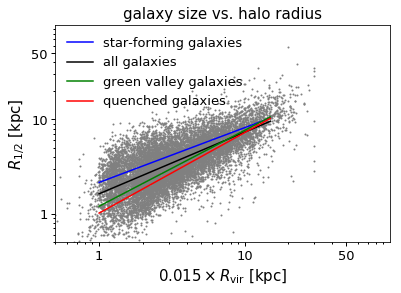

In [10]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

nskip = 20
__=ax.scatter(0.01*sdss['rvir_halo_kpc'][::nskip], 
              sdss['r50_magr_kpc_meert15'][::nskip], 
              color='gray', s=1, label='')

rhalo_abscissa = np.linspace(100, 1500, 200)
__=ax.plot(0.01*rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, 
          color='blue', label='star-forming galaxies')
__=ax.plot(0.01*rhalo_abscissa, norm_all*rhalo_abscissa**alpha_all, 
          color='k', label='all galaxies')
__=ax.plot(0.01*rhalo_abscissa, norm_gv*rhalo_abscissa**alpha_gv, 
          color='green', label='green valley galaxies')
__=ax.plot(0.01*rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, 
          color='red', label='quenched galaxies')


xlim = ax.set_xlim(0.5, 100)
ylim = ax.set_ylim(0.5, 100)
__=ax.set_xticks((1, 10, 50))
__=ax.set_yticks((1, 10, 50))
from matplotlib import ticker
__=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$0.015\times R_{\rm vir}$ [kpc]')
ylabel = ax.set_ylabel(r'$R_{1/2}$ [kpc]')
title = ax.set_title('galaxy size vs. halo radius')
legend = ax.legend()


In [11]:
print("alpha_sf = {0:.2f}; A_sf = {1:.2f}".format(alpha_sf, norm_sf))
print("alpha_gv = {0:.2f}; A_gv = {1:.2f}".format(alpha_gv, norm_gv))
print("alpha_q = {0:.2f}; A_q = {1:.2f}".format(alpha_q, norm_q))


alpha_sf = 0.58; A_sf = 0.15
alpha_gv = 0.80; A_gv = 0.03
alpha_q = 0.85; A_q = 0.02


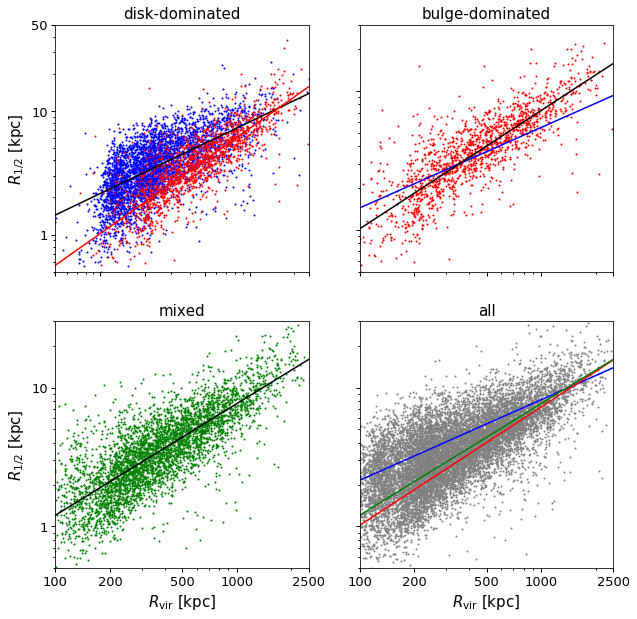

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, 
                                            figsize=(10, 10))

__=ax1.loglog(); __=ax2.loglog(); __=ax3.loglog(); __=ax4.loglog()

nskip = 20
__=ax1.scatter(sdss['rvir_halo_kpc'][mask_sf][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_sf][::nskip], 
              color='blue', s=1, label='')
__=ax2.scatter(sdss['rvir_halo_kpc'][mask_q][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_q][::nskip], 
              color='red', s=1, label='')
__=ax3.scatter(sdss['rvir_halo_kpc'][mask_gv][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_gv][::nskip], 
              color='green', s=1, label='')
__=ax4.scatter(sdss['rvir_halo_kpc'][::nskip], 
              sdss['r50_magr_kpc_meert15'][::nskip], 
              color='gray', s=1, label='')


__=ax1.scatter(sdss['rvir_halo_kpc'][mask_q][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_q][::nskip], 
              color='red', s=1, label='')

rhalo_abscissa = np.linspace(10, 50000, 200)
__=ax1.plot(rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, color='k')
__=ax1.plot(rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, color='red')

__=ax2.plot(rhalo_abscissa, 0.1*rhalo_abscissa**alpha_sf, color='blue')
__=ax2.plot(rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, color='k')

__=ax3.plot(rhalo_abscissa, norm_gv*rhalo_abscissa**alpha_gv, color='k')

__=ax4.plot(rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, color='blue')
__=ax4.plot(rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, color='red')
__=ax4.plot(rhalo_abscissa, norm_gv*rhalo_abscissa**alpha_gv, color='green')


xlim1 = ax1.set_xlim(100, 2500)
xlim2 = ax2.set_xlim(100, 2500)
xlim3 = ax3.set_xlim(100, 2500)
xlim4 = ax4.set_xlim(100, 2500)
ylim1 = ax1.set_ylim(.5, 30)
ylim2 = ax2.set_ylim(.5, 30)
ylim3 = ax3.set_ylim(.5, 30)
ylim4 = ax4.set_ylim(.5, 30)

__=ax1.set_xticks((50, 100, 200, 500, 1000, 2500))
__=ax1.set_yticks((1, 10, 50))
from matplotlib import ticker
__=ax1.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax1.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax1.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax3.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax3.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax3.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax3.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax4.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax4.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax4.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax4.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel3 = ax3.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel1 = ax1.set_ylabel(r'$R_{1/2}$ [kpc]')
xlabel4 = ax4.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel3 = ax3.set_ylabel(r'$R_{1/2}$ [kpc]')
title1 = ax1.set_title('disk-dominated')
title2 = ax2.set_title('bulge-dominated')
title3 = ax3.set_title('mixed')
title4 = ax4.set_title('all')

# fig.savefig('galsize_vs_rhalo_power_law_fits.pdf', 
#             bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')


In [13]:
print(norm_q, norm_sf)

(0.020204472526759248, 0.1494187951412973)


In [14]:
print(alpha_q, alpha_sf)

(0.85139766986587273, 0.57916600282948838)


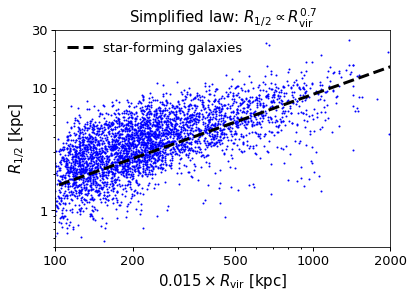

In [15]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

nskip = 20

__=ax.scatter(sdss['rvir_halo_kpc'][mask_sf][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_sf][::nskip], 
              color='blue', s=1, label='')

# __=ax.scatter(sdss['rvir_halo_kpc'][mask_q][::nskip], 
#               sdss['r50_magr_kpc_meert15'][mask_q][::nskip], 
#               color='red', s=1, label='')

alpha_univ = 0.75
revised_norm_q = 0.04
revised_norm_sf = 0.05
rhalo_abscissa = np.linspace(10, 15000, 200)
# __=ax.plot(rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, 
#           color='k', label='star-forming galaxies', lw=3)
# __=ax.plot(rhalo_abscissa, revised_norm_q*rhalo_abscissa**alpha_univ, '--', 
#           color='k', label='quenched galaxies', lw=3)
__=ax.plot(rhalo_abscissa, revised_norm_sf*rhalo_abscissa**alpha_univ, '--', 
          color='k', label='star-forming galaxies', lw=3)
# __=ax.plot(rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, 
#           color='k', label='star-forming galaxies', lw=3)


xlim = ax.set_xlim(100, 2000)
ylim = ax.set_ylim(.5, 30)
__=ax.set_xticks((100, 200, 500, 1000, 2000))
__=ax.set_yticks((1, 10, 30))
from matplotlib import ticker
__=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$0.015\times R_{\rm vir}$ [kpc]')
ylabel = ax.set_ylabel(r'$R_{1/2}$ [kpc]')
title = ax.set_title(r'Simplified law: $R_{1/2} \propto R_{\rm vir}^{0.7}$')
legend = ax.legend()


In [16]:
print(alpha_sf, alpha_univ, alpha_q)

(0.57916600282948838, 0.75, 0.85139766986587273)


In [48]:
print(norm_sf, norm_q)

(0.15, 0.020204472526759248)


$R^\ast_{1/2} \equiv (R_{\rm vir}/R_0)^{\alpha} \equiv A\times R_{\rm vir}^{\alpha} $

So $A \equiv R_0^{-\alpha},$ or alternatively, $R_{0} = A^{\alpha}$

In [52]:
R0_sf = 0.15*0.55
R0_q = 0.02*0.85
print(R0_q, R0_sf)

(0.017, 0.0825)


In [53]:
0.02*0.7

0.013999999999999999

In [19]:
alpha_univ = 0.75
revised_norm_q = 0.04
revised_norm_sf = 0.05


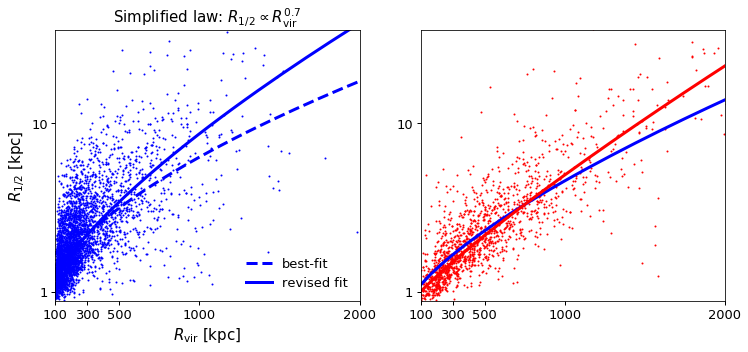

In [47]:
rvir = np.linspace(100, 2000, 30)

c0_sf, c1_sf = 0.1, alpha_univ
rhalf1 = 10**(c0_sf + c1_sf*np.log10(rvir))



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
__=ax.loglog()

nskip = 20

__=ax1.scatter(sdss['rvir_halo_kpc'][mask_sf][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_sf][::nskip], 
              color='blue', s=1, label='')

__=ax2.scatter(sdss['rvir_halo_kpc'][mask_q][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_q][::nskip], 
              color='red', s=1, label='')


rhalo_abscissa = np.linspace(10, 15000, 200)
alpha_univ = 0.7
revised_norm_sf=0.075
revised_norm_q=0.055
__=ax2.plot(rhalo_abscissa, revised_norm_q*rhalo_abscissa**alpha_univ, 
          color='blue', label='quiescent rejigger', lw=3)
__=ax2.plot(rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, 
          color='red', label='quiescent fit', lw=3)

__=ax1.plot(rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, '--', 
          color='blue', label='best-fit', lw=3)
__=ax1.plot(rhalo_abscissa, revised_norm_sf*rhalo_abscissa**alpha_univ,
          color='blue', label='revised fit', lw=3)

xlim1 = ax1.set_xlim(100, 2000)
xlim2 = ax2.set_xlim(100, 2000)
ylim1 = ax1.set_ylim(.5, 15)
ylim2 = ax2.set_ylim(.5, 15)
__=ax1.set_xticks((100, 300, 500, 1000, 2000))
__=ax2.set_xticks((100, 300, 500, 1000, 2000))
__=ax1.set_yticks((1, 10))
__=ax2.set_yticks((1, 10))
from matplotlib import ticker
__=ax1.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax1.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax1.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax1.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel = ax1.set_ylabel(r'$R_{1/2}$ [kpc]')
title = ax1.set_title(r'Simplified law: $R_{1/2} \propto R_{\rm vir}^{0.7}$')
legend = ax1.legend()
